Dependencies: ['os','shutil','sys','PIL','pandas','win32','cv2','numpy','pyautogui','tensorflow','keras','matplotlib',
               'pickle','gensim','sklearn','nltk','unidecode','string','re','collections','wave']
As well as these modules it is required that a folder named 'Tempdataset' to be created within the same folder the project 
is in. The CelebA dataset should also be installed and placed within a folder named dataset. The link the the CelebA dataset download from kaggle is: https://www.kaggle.com/jessicali9530/celeba-dataset 
The given nlpdescriptions.csv file will need to be within the same dataset folder that the celebA dataset is in.

Please give a description of the perpetratorgive a description please


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maxza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\maxza\anaconda3\envs\Final_Project_env\lib\site-packages\ipykernel_launcher.py:133: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
C:\Users\maxza\anaconda3\envs\Final_Project_env\lib\site-packages\ipykernel_launcher.py:134: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
C:\Users\maxza\anaconda3\envs\Final_Project_env\lib\site-packages\ipykernel_launcher.py:135: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
C:\Users\maxza\anaconda3\envs\Final_Project_env\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similar

<Figure size 720x720 with 0 Axes>

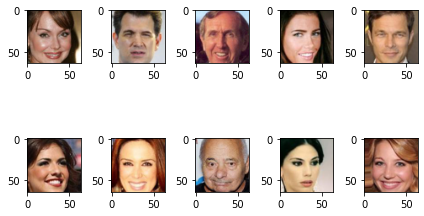

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 64, 64, 3)         3585219   
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 55105     
Total params: 3,640,324
Trainable params: 3,584,323
Non-trainable params: 56,001
_________________________________________________________________
Currently on Epoch 1
	Currently on batch number 0 of 371
	Currently on batch number 100 of 371


KeyboardInterrupt: 

In [4]:
#imports for adding extra machine learning modules to the program.
import os
import shutil
import sys
from PIL import Image, ImageGrab, ImageOps
import pandas as pd
import win32com.client
import win32gui
import win32api, win32con
import cv2
import numpy as np
from numpy import load
import pyautogui
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input, Dense, Reshape, Flatten, BatchNormalization, Conv2D, Dropout, Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
import gensim.downloader as api
from gensim.models import Word2Vec
import gensim.models
from gensim import utils
from gensim.test.utils import datapath
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import IncrementalPCA
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
from collections import defaultdict
import wave


#input a text description for a desciption of the perpetrator 
person = input('Please give a description of the perpetrator')
#if the pyaudio libraries are set up properly this would be retrieved with microphonein = input("")
#do the same breaking down of the persons description
df = pd.read_csv('dataset/nlpdescriptions.csv')
df.head()
#stopwords are unneeded words that we can remove to simplify the model
nltk.download('stopwords')
#turn the dataset to a list to feed into the model.
df1 = df['Descriptions'].tolist()
#each word will need to be lematized which involves simplifying the word to its most basic form
lemmatizer = nltk.stem.WordNetLemmatizer()
#makes all the text lower case for even more simplicity.
df1 = [x.lower() for x in df1]
descriptions = {}
person = word_tokenize(person)
#each loop is making sure that every description has each word correctly simplified or removed
person = [word for word in person if not word in stopwords.words()]
stopset = stopwords.words('english') + list(string.punctuation)
person = ["".join(i for i in s if i not in string.punctuation) for s in person]
person = [s for s in person if s]
for l in range(len(person)):
    person[l] = lemmatizer.lemmatize(person[l])

for f in range(len(df1)):
    #all the words are taken as individual words 
    descriptions[f] = word_tokenize(df1[f])
    
for i in range(len(descriptions)):


    nlp = [word for word in descriptions[i] if not word in stopset]
    nlp = [s for s in nlp if s]

    for m in range(len(nlp)):

        descriptions[f] = lemmatizer.lemmatize(nlp[m])



nlp = list(descriptions.values())

nlp.append(person)

#the words with their neighbours are then input into the model so the model can give a score for context.
model = Word2Vec(nlp, min_count=1, size=50, workers=4, window=3, sg=1)



#each attribute we are determining for is given a score this is set to 0 at the beggining.
youngscore = 0
necktiescore = 0
necklacescore = 0
lipstickscore = 0
hatscore = 0
earringsscore = 0
wavyscore = 0
straightscore = 0
smilingscore = 0
sideburnsscore = 0
rosyscore = 0
recedingscore = 0
pointyscore = 0
palescore = 0
ovalscore = 0
beardlessscore = 0
narrowscore = 0
mustachescore = 0
malescore = 0
cheekbonesscore = 0
makeupscore = 0
grayscore = 0
goateescore = 0
glassesscore = 0
chinscore = 0
chubbyscore = 0
eyebrowsscore = 0
brownscore = 0
blondscore = 0
blackscore = 0
nosescore = 0
lipsscore = 0
bangsscore = 0
baldscore = 0
bagsscore = 0
attractivescore = 0
archedscore = 0
shadowscore = 0

for z in range(len(person)):
    #euclidean distance is then used to find out how close each word in the description is to the word that is being scorred. 
    youngscore = youngscore + model.similarity ('young', person[z])
    necktiescore = necktiescore + model.similarity('necktie', person[z])
    necklacescore = necklacescore + model.similarity('necklace', person[z])
    lipstickscore = lipstickscore + model.similarity('lipstick', person[z])
    hatscore = hatscore + model.similarity('hat', person[z])
    earringsscore = earringsscore + model.similarity('earrings', person[z])   
    wavyscore = wavyscore + model.similarity('wavy', person[z])    
    straightscore = straightscore + model.similarity('straight', person[z])    
    smilingscore = smilingscore + model.similarity('smiling', person[z])    
    sideburnsscore = sideburnsscore + model.similarity('sideburns', person[z])
    rosyscore = rosyscore + model.similarity('rosy', person[z])
    recedingscore = recedingscore + model.similarity('receding', person[z])    
    pointyscore = pointyscore + model.similarity('pointy', person[z])    
    palescore = palescore + model.similarity('pale', person[z])    
    ovalscore = ovalscore + model.similarity('oval', person[z])    
    beardlessscore = beardlessscore + model.similarity('beardless', person[z])    
    narrowscore = narrowscore + model.similarity('narrow', person[z])    
    mustachescore = mustachescore + model.similarity('mustache', person[z])    
    malescore = malescore + model.similarity('male', person[z])
    cheekbonesscore = cheekbonesscore + model.similarity('cheekbones', person[z])    
    makeupscore = makeupscore + model.similarity('makeup', person[z])    
    grayscore = grayscore + model.similarity('gray', person[z])    
    goateescore = goateescore + model.similarity('goatee', person[z])    
    glassesscore = glassesscore + model.similarity('glasses', person[z])    
    chinscore = chinscore + model.similarity('chin', person[z])    
    chubbyscore = chubbyscore + model.similarity('chubby', person[z])    
    eyebrowsscore = eyebrowsscore + model.similarity('eyebrows', person[z])
    brownscore = brownscore + model.similarity('brown', person[z])  
    blondscore = blondscore + model.similarity('blond', person[z])
    blackscore = blackscore + model.similarity('black', person[z])
    nosescore = nosescore + model.similarity('nose', person[z])
    lipsscore = lipsscore + model.similarity('lips', person[z])
    bangsscore = bangsscore + model.similarity('bangs', person[z])
    baldscore = baldscore + model.similarity('bald', person[z])
    bagsscore = bagsscore + model.similarity('bags', person[z])
    attractivescore = attractivescore + model.similarity('attractive', person[z])
    archedscore = archedscore + model.similarity('arched', person[z])
    shadowscore = shadowscore + model.similarity('shadow', person[z])
#these attribute scores are then tied to the attribute names
attributes = [youngscore,necktiescore,necklacescore,lipstickscore,hatscore,earringsscore,
              wavyscore,straightscore,smilingscore,sideburnsscore,rosyscore,recedingscore,pointyscore,
              palescore,ovalscore,beardlessscore,narrowscore,mustachescore,malescore,cheekbonesscore,makeupscore,grayscore,
              goateescore,glassesscore,chinscore,chubbyscore,eyebrowsscore,brownscore,blondscore,blackscore,nosescore,lipsscore,
              bangsscore,baldscore,bagsscore,attractivescore,archedscore,shadowscore]    

attributesname = ['youngscore','necktiescore','necklacescore','lipstickscore','hatscore','earringsscore',
              'wavyscore','straightscore','smilingscore','sideburnsscore','rosyscore','recedingscore','pointyscore',
              'palescore','ovalscore','beardlessscore','narrowscore','mustachescore','malescore','cheekbonesscore','makeupscore','grayscore',
              'goateescore','glassesscore','chinscore','chubbyscore','eyebrowsscore','brownscore','blondscore','blackscore','nosescore','lipsscore',
              'bangsscore','baldscore','bagsscore','attractivescore','archedscore','shadowscore']  

topattributes = [attributesname for attributesname in sorted(attributesname, reverse=True)]
#the top 5 attributes are then selected to make the face.
fivebest = []
for fiverange in range(5):
    fivebest.append(topattributes[fiverange])

#each attribute is set to 0 indicating they are not being used
youngs = 0
neckties = 0
necklaces = 0
lipsticks = 0
hats = 0
earringss = 0
wavys = 0
straights = 0
smilings = 0
sideburnss = 0
rosys = 0
recedings = 0
pointys = 0
pales = 0
ovals = 0
beardlesss = 0
narrows = 0
mustaches = 0
males = 0
cheekboness = 0
makeups = 0
grays = 0
goatees = 0
glassess = 0
chins = 0
chubbys = 0
eyebrowss = 0
browns = 0
blonds = 0
blacks = 0
noses = 0
lipss = 0
bangss = 0
balds = 0
bagss = 0
attractives = 0
archeds = 0
shadows = 0
#if any of the attributes are found in the top 5 selected attributes these are then used and switched to 1 as the score.
for x in range(len(fivebest)):
    if "young" in fivebest[x]:
        youngs = 1
    if "necktie" in fivebest[x]:
        necktie = 1
    if "necklace" in fivebest[x]:
        necklaces = 1
    if "lipstick" in fivebest[x]:
        lipsticks = 1
    if "hat" in fivebest[x]:
        hats = 1
    if "earrings" in fivebest[x]:
        earringss = 1
    if "wavy" in fivebest[x]:
        wavys = 1
    if "straight" in fivebest[x]:
        straights = 1
    if "smiling" in fivebest[x]:
        smilings = 1
    if "sideburns" in fivebest[x]:
        sideburnss = 1
    if "rosy" in fivebest[x]:
        rosys = 1
    if "receding" in fivebest[x]:
        recedings = 1
    if "pointy" in fivebest[x]:
        pointys = 1
    if "pale" in fivebest[x]:
        pales = 1
    if "oval" in fivebest[x]:
        ovals = 1
    if "beardless" in fivebest[x]:
        beardlesss = 1
    if "narrow" in fivebest[x]:
        narrows = 1
    if "mustache" in fivebest[x]:
        mustaches = 1
    if "male" in fivebest[x]:
        males = 1
    if "cheekbones" in fivebest[x]:
        cheekboness = 1
    if "makeup" in fivebest[x]:
        makeups = 1
    if "gray" in fivebest[x]:
        grays = 1
    if "goatee" in fivebest[x]:
        goatees = 1
    if "glasses" in fivebest[x]:
        glassess = 1
    if "chin" in fivebest[x]:
        chins = 1
    if "chubby" in fivebest[x]:
        chubbys = 1
    if "eyebrows" in fivebest[x]:
        eyebrowss = 1
    if "brown" in fivebest[x]:
        browns = 1
    if "blond" in fivebest[x]:
        blonds = 1
    if "black" in fivebest[x]:
        blacks = 1
    if "nose" in fivebest[x]:
        noses = 1
    if "lips" in fivebest[x]:
        lipss = 1
    if "bangs" in fivebest[x]:
        bangss = 1
    if "bald" in fivebest[x]:
        balds = 1
    if "bags" in fivebest[x]:
        bagss = 1
    if "attractive" in fivebest[x]:
        attractives = 1
    if "arched" in fivebest[x]:
        archeds = 1
    if "shadow" in fivebest[x]:
        shadows = 1
        
useimages = []
df = pd.read_csv('dataset/list_attr_celeba.csv')
totalimages = df['image_id'].tolist()
shadow = df['5_o_Clock_Shadow'].tolist()
arch = df['Arched_Eyebrows'].tolist()
attracting = df['Attractive'].tolist()
bageyes = df['Bags_Under_Eyes'].tolist()
balding = df['Bald'].tolist()
bang = df['Bangs'].tolist()
lips = df['Big_Lips'].tolist()
nose = df['Big_Nose'].tolist()
black = df['Black_Hair'].tolist()
blond = df['Blond_Hair'].tolist()
brown = df['Brown_Hair'].tolist()
bush = df['Bushy_Eyebrows'].tolist()
chub = df['Chubby'].tolist()
doublec = df['Double_Chin'].tolist()
glass = df['Eyeglasses'].tolist()
goat = df['Goatee'].tolist()
gray = df['Gray_Hair'].tolist()
makeu = df['Heavy_Makeup'].tolist()
cheek = df['High_Cheekbones'].tolist()
female = df['Male'].tolist()
mustaches = df['Mustache'].tolist()
narrow = df['Narrow_Eyes'].tolist()
beard = df['No_Beard'].tolist()
oval = df['Oval_Face'].tolist()
pale = df['Pale_Skin'].tolist()
point = df['Pointy_Nose'].tolist()
recedinghair = df['Receding_Hairline'].tolist()
rosych = df['Rosy_Cheeks'].tolist()
sideb = df['Sideburns'].tolist()
smile = df['Smiling'].tolist()
straight = df['Straight_Hair'].tolist()
wave = df['Wavy_Hair'].tolist()
ear = df['Wearing_Earrings'].tolist()
hat = df['Wearing_Hat'].tolist()
lipstick = df['Wearing_Lipstick'].tolist()
laceneck = df['Wearing_Necklace'].tolist()
tieneck= df['Wearing_Necktie'].tolist()
child = df['Young'].tolist()

#the used images are then moved from the major dataset folder to the temporary one.
if shadows == 1:
    for a in range(len(shadow)):
        if shadow[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])

if archeds == 1:
    for a in range(len(arch)):
        if arch[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])

if attractives == 1:
    for a in range(len(attracting)):
        if attracting[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])

if bagss == 1:
    for a in range(len(bageyes)):
        if bageyes[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])

if balds == 1:
    for a in range(len(balding)):
        if balding[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if bangss == 1:
    for a in range(len(bang)):
        if bang[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if lipss == 1:
    for a in range(len(lips)):
        if lips[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if noses == 1:
    for a in range(len(nose)):
        if nose[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if blacks == 1:
    for a in range(len(black)):
        if black[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if blonds == 1:
    for a in range(len(blond)):
        if blond[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if browns ==  1:
    for a in range(len(brown)):
        if brown[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if eyebrowss == 1:
    for a in range(len(bush)):
        if bush[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if chubbys == 1:
    for a in range(len(chub)):
        if chub[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if chins == 1:
    for a in range(len(doublec)):
        if doublec[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if glassess == 1:
    for a in range(len(glass)):
        if glass[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if goatees == 1:
    for a in range(len(goat)):
        if goat[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if grays == 1:
    for a in range(len(gray)):
        if gray[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if makeups == 1:
    for a in range(len(makeu)):
        if makeu[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if cheekboness == 1:
    for a in range(len(cheek)):
        if cheek[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if males == 1:
    for a in range(len(female)):
        if female[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if mustaches == 1:
    for a in range(len(mustaches)):
        if mustaches[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if narrows == 1:
    for a in range(len(narrow)):
        if narrow[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if beardlesss == 1:
    for a in range(len(beard)):
        if beard[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if ovals == 1:
    for a in range(len(oval)):
        if oval[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if pales == 1:
    for a in range(len(pale)):
        if pale[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])

if pointys == 1:
    for a in range(len(point)):
        if point[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])

if recedings == 1:
    for a in range(len(recedinghair)):
        if recedinghair[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if rosys == 1:
    for a in range(len(rosych)):
        if rosych[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])

if sideburnss == 1:
    for a in range(len(sideb)):
        if sideb[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])

if smilings == 1:
    for a in range(len(smile)):
        if smile[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if straights == 1:
    for a in range(len(straight)):
        if straight[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if wavys == 1:
    for a in range(len(wave)):
        if wave[a] == 1:
            if totalimages[a] not in useimages:
                useimages.append(totalimages[a])


if earringss == 1:
    for a in range(len(ear)):
        if ear[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if hats == 1:
    for a in range(len(hat)):
        if hat[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if lipsticks == 1:
    for a in range(len(lipstick)):
        if lipstick[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if necklaces == 1:
    for a in range(len(laceneck)):
        if laceneck[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


if neckties == 1:
    for a in range(len(tieneck)):
        if tieneck[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])

if youngs == 1:
    for a in range(len(child)):
        if child[a] == 1:
            if totalimages[a] not in useimages:    
                useimages.append(totalimages[a])


for b in useimages:
#This path may need changing when being run on a different PC however if the dependancies have been followed then this should work.
    shutil.copy("dataset/img_align_celeba/img_align_celeba/" + b, 'Tempdataset')
path_celeb = []
train_path_celeb = "Tempdataset/"
for path in os.listdir(train_path_celeb):
    #any images within the tempdata set folder are then set as the dataset
    if '.jpg' in path:
        path_celeb.append(os.path.join(train_path_celeb, path))
#we save a quater for testing and as this value changes we count how many images are being used.
quarter = len(useimages)/4
quarter = int(quarter)

new_path=path_celeb[0:quarter]
#the images are cropped to focus on the face and save time
crop = (30, 55, 150, 175)
#they are each resized to 64 by 64 and set as a numpy array
images = [np.array((Image.open(path).crop(crop)).resize((64,64))) for path in new_path]

for i in range(len(images)):
    images[i] = ((images[i] - images[i].min())/(255 - images[i].min()))
images = np.array(images)


plt.figure(figsize=(10, 10))
fig,ax=plt.subplots(2,5)
#selects these images by incrementally moving through the selected images in the set up case is set to 8 as the incriment as there are not many images potentially
idx = 8

for i in range(2):
    for j in range(5):
            ax[i,j].imshow(images[idx].reshape(64,64,3))

            
            idx+= 6
            
plt.tight_layout()
plt.show()
X_train = images
#creates noise randomly which the generator will create the images with.
noise_shape = 100
#creates a sequential model
generator=Sequential()
#The dense layer take input from the noise input
generator.add(Dense(4*4*512,input_shape=[noise_shape]))
#reshapes the next layer into the given shape
generator.add(Reshape([4,4,512]))
#creates a 2D convolution layer for the image processing 
generator.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"))
#The relu layer stops the neural network scaling exponentially and switches to linear scaling
generator.add(LeakyReLU(alpha=0.2))
#Batch normalization helps normalise the input
generator.add(BatchNormalization())
#these layers are then repeated with slightly different inputs for the convolutional layer
generator.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(3, kernel_size=4, strides=2, padding="same", activation='sigmoid'))
#The Discriminator model then gets created as a sequential model
discriminator = Sequential()
discriminator.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=[64,64, 3]))
discriminator.add(LeakyReLU(alpha=0.2))
#the dropout layer helps prevent overfitting by dropping out inputs at a rate of 0.4 in this case
discriminator.add(Dropout(0.4))
discriminator.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.4))
#Flattening allows the layers to be passed in a single connected layer
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
#The GAN squential connectes the descriminator and the generator so that they feed into eachother and help the neural network improve
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
#The discriminator needs to be set to false in terms of training so that when combining the models only the generator is being trained.
discriminator.trainable = False
GAN.compile(optimizer='adam',loss='binary_crossentropy')
GAN.layers
GAN.summary()
#I have chosen 300 epochs as when testing this seemed like it produced reasonable images whilst taking a few days to train.
#better images can be achieved with more training but this isnt feasible within the scope of the project
epochs = 300 
batch_size = 128
#arrays to print the loss recieved from each epoch to see its working.
D_loss=[]
G_loss=[]
#The program is to be run on the first gpu the system can find
with tf.device('/gpu:0'):
    #keeps count of the number of epochs so you can see how long is left with the program
    for epoch in range(epochs):
        print(f"Currently on Epoch {epoch+1}")
    
        #This is completed for every batch
        for i in range(X_train.shape[0]//batch_size):
            #for every 100th batch inform the user of what batch numbe they are on
            if (i)%100 == 0:
                print(f"\tCurrently on batch number {i} of {len(X_train)//batch_size}")
            #The noise is created in the range of -1 to 1 to represent all the possibilities for colour there are also 3 channels of colour.
            noise=np.random.uniform(-1,1,size=[batch_size,noise_shape])
            #with each batch this should get a little bit more accurate
            gen_image = generator.predict_on_batch(noise)
            #train on real image
            train_dataset = X_train[i*batch_size:(i+1)*batch_size]
            #after training the generator we make it possible to train the discriminator again
            train_label=np.ones(shape=(batch_size,1))
            discriminator.trainable = True
            #train on fake image
            #labels d_loss1 and d_loss2 are created to track how the disciminator is doing when dealing with real and fake images
            #this shows false positives as we see when the discriminator is finding the correct result
            d_loss1 = discriminator.train_on_batch(train_dataset,train_label)
            train_label=np.zeros(shape=(batch_size,1))
            d_loss2 = discriminator.train_on_batch(gen_image,train_label)
            noise=np.random.uniform(-1,1,size=[batch_size,noise_shape])
            train_label=np.ones(shape=(batch_size,1))
            #after training the descriminator training is set to false again
            discriminator.trainable = False
            #train the generator based on the losses of the discriminator
            g_loss = GAN.train_on_batch(noise, train_label)
            D_loss.append(d_loss1+d_loss2)
            #print the generator losses
            G_loss.append(g_loss)
        
        #for every 5th epoch a sample is taken of the created image 
        if epoch % 5 == 0:
            samples = 10
            x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples,100)))

            for k in range(samples):
                plt.subplot(2, 5, k+1)
                plt.imshow(x_fake[k].reshape(64,64,3))
                plt.xticks([])
                plt.yticks([])

        
            plt.tight_layout()
            plt.show()
        print('Epoch: %d,  Loss: D_real = %.3f, D_fake = %.3f,  G = %.3f' %   (epoch+1, d_loss1, d_loss2, g_loss))

        
print('Training is complete')
#once training is complete we show each of the created images 
noise=np.random.uniform(-1,1,size=[500,noise_shape])
im=generator.predict(noise)
for i in range(5):
    plt.figure(figsize=(7,7))   
    for k in range(20):
        noise=np.random.uniform(-1,1,size=[100,noise_shape])
        im=generator.predict(noise) 
        plt.subplot(5, 4, k+1)
        plt.imshow(im[k].reshape(64,64,3))
        plt.xticks([])
        plt.yticks([])
 
    plt.tight_layout()
plt.show()
